In [1]:
import pandas as pd
import numpy as np
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()

[2024-09-02 11:26:14,536][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-09-02 11:26:14,593][log.log][INFO] Query execution time: 0.021252870559692383 seconds.


<Axes: xlabel='Date'>

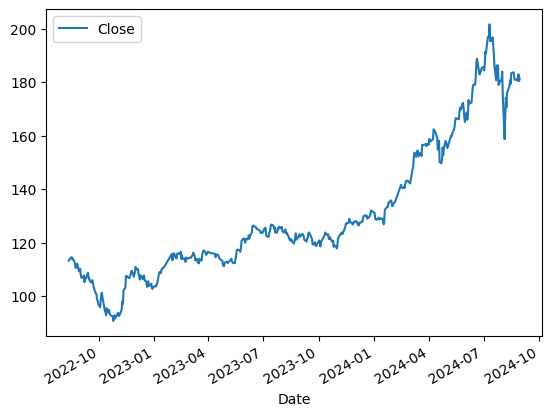

In [2]:
df.plot()

In [3]:
PMT = 3000
M = 3
BH = 0.2
N = 2

start = "2023-01-01"
end = "2024-03-01"

In [4]:
dfm = df.resample("BME").last()
dfm = dfm.loc[start:end]
dfm["3M-returns"] = dfm.pct_change(M)
dfm

,Close,3M-returns
Date,,
2023-01-31,113.361,NaN
2023-02-28,113.840,NaN
2023-03-31,116.523,NaN
2023-04-28,112.499,-0.007604
2023-05-31,120.883,0.061868
2023-06-30,123.710,0.061679
2023-07-31,125.225,0.113121
2023-08-31,122.211,0.010986
2023-09-29,119.246,-0.036084


In [6]:
total_cost_list = []
unit_list = []
pre_NAV_list = [0]
TR_list = [0]

for i, price in enumerate(dfm['Close']):
    if i == 0:
        total_cost = PMT
        unit= PMT / price
        total_cost_list.append(total_cost)
        unit_list.append(unit)
    if i > 0:
        if dfm['3M-returns'].iloc[i] < BH:
            total_cost += N * PMT
            unit = unit + (N * PMT / price)
        else:
            total_cost += PMT
            unit = unit + ( PMT / price)
        pre_NAV = unit_list[i-1] * price
        TR = pre_NAV / total_cost_list[-1] -1 
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)

dfm['total_cost'] = total_cost_list
dfm['unit'] = unit_list
dfm['pre_NAV'] = pre_NAV_list
dfm['TR'] = TR_list
dfm


,Close,3M-returns,total_cost,unit,pre_NAV,TR
Date,,,,,,
2023-01-31,113.361,NaN,3000,26.464128,0.000000,0.000000
2023-02-28,113.840,NaN,6000,52.816904,3012.676317,0.004225
2023-03-31,116.523,NaN,9000,78.562894,6154.384070,0.025731
2023-04-28,112.499,-0.007604,15000,131.896701,8838.246985,-0.017973
2023-05-31,120.883,0.061868,21000,181.531472,15944.068928,0.062938
2023-06-30,123.710,0.061679,27000,230.031997,22457.258399,0.069393
2023-07-31,125.225,0.113121,33000,277.945753,28805.756875,0.066880
2023-08-31,122.211,0.010986,39000,327.041170,33968.028377,0.029334
2023-09-29,119.246,-0.036084,45000,377.357323,38998.351309,-0.000042


<Axes: xlabel='Date'>

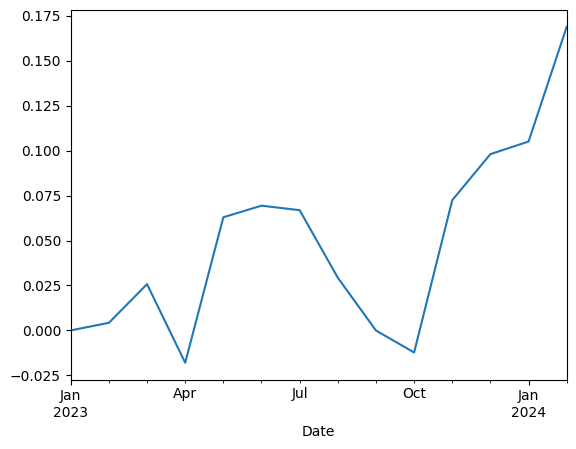

In [7]:
dfm['TR'].plot()

In [8]:
print('TR: ',dfm['TR'].iloc[-1]*100)
print('AR: ',((1+dfm['TR'].iloc[-1])**(12/len(dfm))-1)*100)

TR:  16.89367252681342
AR:  14.315882746832154
